In [2]:
from IPython.display import clear_output
import numpy as np
from scipy import misc
import scipy
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

#### Lecture 6: Advanced Numpy, Documentation, and Workflow
Welcome back!

Here's what we've got lined up for today:

1. Higher dimensional arrays
2. Indexing (it's easy and universal!)
3. Finding, reading documentation
4. Design process + workflow (we'll work through an example)

###### Learning Objectives

Want to get you more comfortable with syntax, planning and executing your projects, and finding what you need, on Google, or in the inline documentation sources

As always, please follow along, experiment, stumble, and explore in your own notebook

You can use:
1. corn
2. Anaconda
3. Python REPL (discouraged)

#### Getting Lectures and Solutions

Just want to show you explicitly how you can get and update the solutions and lectures repository

#### Shebang

You can put (and you should) 

\#!/usr/bin/python 

to run more easily in terminal!

#### Review from Tuesday

Covered:

1. Basic numpy syntax

2. Basic plotting

# QUESTIONS?

In [118]:
# I'll use import numpy as np throughout
import numpy as np

# We were able to get data into numpy with np.array()
print(np.array([1,2,3]))

# How to get a numpy array with 0 - 49?
print(np.array(range(50)))

[1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


In [122]:
# What about 0.0, 0.1, 0.2, ... 0.9?
print(np.arange(0, 1.0, 0.1))
print(np.linspace(0, 0.9, 10))

# arange, linspace, logspace


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [ ]:
# np.arange(a, b+c, c) === np.linspace(a, b, c^(-1))

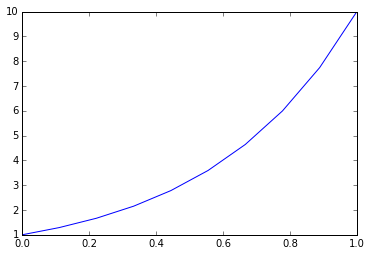

In [125]:
# plotting is easy, how about an exponential curve?
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 10), np.logspace(0, 1, 10))
# gets rid of annoying axes output... NECESSARY out of IPythonNotebook
plt.show()

In [4]:
# Remember that Python was able to coerce ints to strings?
print(np.array(['Def NaN', 1]))

# Magic!? Nope... numpy finds the 'smallest' type that's 'big enough'
# to hold everything... (strings can 'hold' numbers)

['Def NaN' '1']


In [126]:
# We also saw we could do basic math
a, b = np.array([1,2,3]), np.array([4,5,6])

a + b, a * b
# convenient for specifying lots of calculations in parallel!

(array([5, 7, 9]), array([ 4, 10, 18]))

In [107]:
# Just a note, we can also tell numpy how to convert things
print(np.array(['Def NaN', 1], str))

['Def NaN' '1']


Anything kind of interesting about the above?

In [7]:
# What's up with the str?

print(type(str))

<class 'type'>


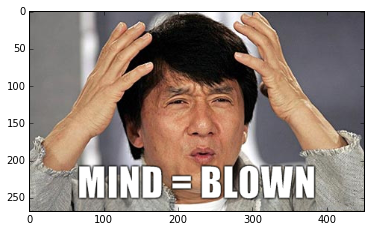

In [127]:
img = misc.imread('/Users/chstansbury/teaching/91si/mindblown.jpg')

plt.imshow(img)

In [9]:
# Oh and by the way...
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(268, 450, 3)


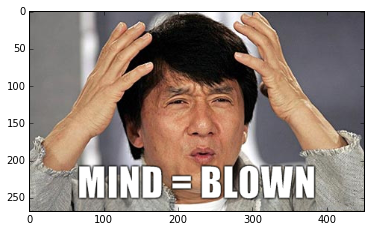

In [130]:
img[:,:,0], img[:,:,1], img[:,:,2] = np.copy(img[:,:,1]), np.copy(img[:,:,2]), np.copy(img[:,:,0])

plt.imshow(img)

In [13]:
# Ahem... to get back to np.array()...
# What if we want to make numbers from strings and other numbery things?

print(np.array(['NaN', '3.14159', 3], float))

[     nan  3.14159  3.     ]


In [14]:
documentation = np.array.__doc__
print("\n".join(documentation.split("\n")[:16]))


array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)

    Create an array.

    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an
        object whose __array__ method returns an array, or any
        (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then
        the type will be determined as the minimum type required
        to hold the objects in the sequence.  This argument can only
        be used to 'upcast' the array.  For downcasting, use the
        .astype(t) method.


In [15]:
# Now that we have arrays in numpy, we can do some more basic math with them

r_ness = np.sum(img[:, :, 0]) / np.prod(img.shape[:-1])
g_ness = np.sum(img[:, :, 1]) / np.prod(img.shape[:-1])
b_ness = np.sum(img[:, :, 2]) / np.prod(img.shape[:-1])
print((r_ness, g_ness, b_ness))

(141.50356550580432, 123.94682421227198, 114.68964344941956)


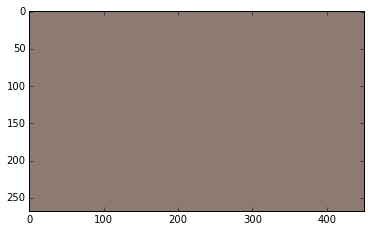

In [16]:
# So average image is...

img[:,:] = (r_ness, g_ness, b_ness)

plt.imshow(img)
plt.show()

#### Alright! New Material!


##### Getting Higher Dimensional Arrays

In [ ]:
# It was easy to make numpy "lists"


In [115]:
# Not much harder to get higher dimensional arrays!

levi_civita = np.array([[[0,0,0],[0,0,1],[0,-1,0]],
                        [[0,0,-1],[0,0,0],[1,0,0]],
                        [[0,1,0],[-1,0,0],[0,0,0]]])

print(levi_civita)

[[[ 0  0  0]
  [ 0  0  1]
  [ 0 -1  0]]

 [[ 0  0 -1]
  [ 0  0  0]
  [ 1  0  0]]

 [[ 0  1  0]
  [-1  0  0]
  [ 0  0  0]]]


##### Doing this manually is a massive pain!

Lots of helpful utilities exist for constructing "standard" arrays

In [134]:
# Here are a few, maybe want an array of zeros?

print(np.zeros((5,4)))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [135]:
# or an identity matrix?
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [64]:
# Also saw linspace and logspace

In [69]:
# np.loadtxt()
numbers = np.loadtxt("/Users/chstansbury/teaching/91si/numbers.txt")

print(numbers)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


##### Have plenty of arrays how, but now to get data into/out of them?

Basic sliciing syntax still works!

In [137]:
# basic slicing
a = np.linspace(0, 5, 20)
print(a)

a[10:15]

[ 0.          0.26315789  0.52631579  0.78947368  1.05263158  1.31578947
  1.57894737  1.84210526  2.10526316  2.36842105  2.63157895  2.89473684
  3.15789474  3.42105263  3.68421053  3.94736842  4.21052632  4.47368421
  4.73684211  5.        ]


array([ 2.63157895,  2.89473684,  3.15789474,  3.42105263,  3.68421053])

In [139]:
# Can also index with stride
a[::2]
# remember we reversed a list with [::-1]?

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211])

#### Okay, but what about those higher dimensional arrays?

In [147]:
# can use comma separated list of slices
a = np.random.randn(3, 3)
print(a)

a[2,:] = 0
print(a[:,1].shape)
print(a)

[[ 0.7431592  -0.21182917  1.02908689]
 [ 0.44824378 -1.18550377  0.91168121]
 [-0.4378325  -1.04745861 -0.5889076 ]]
(3,)
[[ 0.7431592  -0.21182917  1.02908689]
 [ 0.44824378 -1.18550377  0.91168121]
 [ 0.          0.          0.        ]]


In [70]:
# This is genuinely different than standard Python lists!
pylist_numbers = [list(l) for l in numbers]
print(pylist_numbers)
print(pylist_numbers[:][:2])

# not the same! Why?

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]
[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]


In [222]:
# Whenever you're slicing in numpy, the thing you need to think
# about is the shape of what you start with, and what you end with
# LHS and RHS of equals should have "similar" shape (broadcasting)

numbers[:,-1] = 0
print(numbers)

# Think of the shape of the left hand side... and then filling it with 0s

[[ 1.  2.  0.]
 [ 4.  5.  0.]
 [ 7.  8.  0.]]


#### Logical indexing

We can also slice into arrays using logical expressions!

In [156]:
# get random matrix
a = np.random.randn(3, 3)
print(a)
print(a < 0)

a[a < 0] *= -1
print(a)
# oops... only wanted positive elements!

[[-2.04679904 -0.52961241  0.68985845]
 [ 0.33276439 -1.03995369  0.07536092]
 [-0.65786688  0.08869099 -1.06850337]]
[[ True  True False]
 [False  True False]
 [ True False  True]]
[[ 2.04679904  0.52961241  0.68985845]
 [ 0.33276439  1.03995369  0.07536092]
 [ 0.65786688  0.08869099  1.06850337]]


#### Index Arrays

We can also set several selections at the same time, like a "union" of the selections

In [158]:
a = np.arange(10, 0, -1)
print(a)

indexes = np.array([1,8,4])
print(a[indexes]) # get second, ninth, fifth thing out of a

[10  9  8  7  6  5  4  3  2  1]
[9 2 6]


#### Workflow and Documentation

The rest of our plan for today involves

1. Documentation
2. Workflow

I think the most effective way to go about this is to demonstrate how I would work through a problem in IPython notebook

I won't use git, but for a larger project I would!

##### Problem Statement

You have a recording of a piano where only a single note is played at a time.

Tag the notes.

What are our inputs?

What do we want for our outputs?

What do we need to accomplish to get there?

#### Break this apart

1. Load file (what kind of data is this?)

2. Fourier transform

3. Identify notes + split audio

4. Play sounds, print notes

How can we use numpy and what we just learned about to solve this problem?

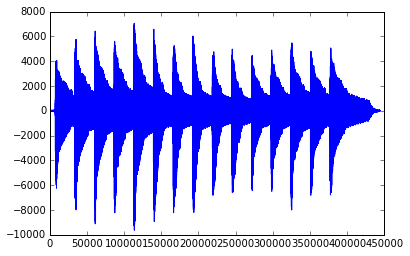

In [159]:
from scipy.io import wavfile

fqs, scale = scipy.io.wavfile.read('/Users/chstansbury/teaching/91si/C_major.wav')

plt.plot(range(len(scale)), scale)

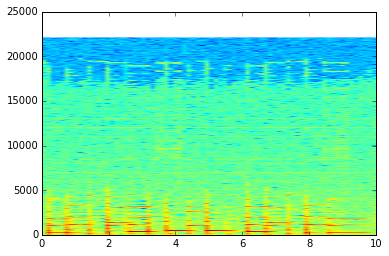

(3001, 74)
(74,)


In [171]:
(spectrum, frequencies, t, im) = plt.specgram(scale, Fs=fqs, NFFT=6000, noverlap=10)
plt.show()

print(spectrum.shape)
print(t.shape)

In [169]:
max_freqs = []
for t_i in range(len(t)):
    max_freqs.append(frequencies[np.argmax(spectrum[:, t_i])])
    
    # deal with zeros, could also trim
    if max_freqs[-1] == 0:
        max_freqs[-1] = 1


alt_max_freq = frequencies[np.argmax(spectrum[:,:], axis=0)]

print(max_freqs[:20])
alt_max_freq[alt_max_freq == 0] = 1
print(alt_max_freq[:20])

[9646.875, 1, 9646.875, 86.1328125, 516.796875, 1, 1, 1, 1291.9921875, 1, 9646.875, 9646.875, 9646.875, 1, 1, 258.3984375, 258.3984375, 258.3984375, 258.3984375, 258.3984375]
[  9.64687500e+03   1.00000000e+00   9.64687500e+03   8.61328125e+01
   5.16796875e+02   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.29199219e+03   1.00000000e+00   9.64687500e+03   9.64687500e+03
   9.64687500e+03   1.00000000e+00   1.00000000e+00   2.58398438e+02
   2.58398438e+02   2.58398438e+02   2.58398438e+02   2.58398438e+02]


In [16]:
def notify(frequency):
    notes = {'C4': 261.6, 'D4': 293.6, 'E4': 329.6, 'F4': 349.2, 
             'G4': 391.99, 'A4': 440, 'B4': 493.8, 'C5': 523.3}
    
    if frequency < notes['C4'] or frequency > notes['C5']:
        # could do something else
        return 'Out of Range'
    
    dist = float('inf')
    best_note = ''
    for n, f in notes.items():
        if abs(frequency - f) < dist:
            dist = abs(frequency - f)
            best_note = n
    return best_note

notes = []
for f in max_freqs:
    notes.append(notify(f))
    

In [17]:
def compress(seq, ts):
    if len(seq) == 0:
        return []
    
    fst = seq[0]
    idx = next((i for i, x in enumerate(seq) if x != fst), None)
    
    if idx == None or idx is None:
        return [(fst, (ts[0], ts[-1]))]
    
    return [(fst, (ts[0], ts[idx]),)] + compress(seq[idx:], ts[idx:])

In [170]:
from IPython.display import Audio
from IPython.core.display import HTML
from IPython.display import display
import time

print(scale.shape)
for note, rng in compress(notes, t):
    if note == 'Out of Range':
        continue
    idx_start, idx_end = int(fqs*rng[0]), int(fqs*rng[1])
    idx_start = idx_start - 1500
    idx_end = idx_end - 1500
    if idx_start < 0:
        idx_start = 0
    if idx_end < 0:
        idx_end = 0
    print(note)
    display(Audio(scale[idx_start:idx_end], rate=fqs, autoplay=True))
    time.sleep(1)

(443904,)
C4


D4


E4


F4


G4


A4


B4


C5


B4


A4


G4


F4


E4


D4


C4


#### Syntax Review

In [ ]:
# Can covert between lists and np.ndarray
list(...)
np.array(...) # np.array is the translation function, np.ndarray is the type!

# Useful functions
zeros((3, 4, 5,)) # tuple as argument
eye(5) # integer size as argument
np.linspace(start, finish, steps)
np.arange(start, finish, step_size)
np.logspace(a,b,c) === np.exp(np.linspace(a,b,c))

# Indexing
arr[:,:,5:20] # comma separated list of slices, : means 0:-1 (the whole axis)

# Boolean indexing
arr[arr == 'str'] = 'not str' # replaces all instances of 'str' with 'not str'. Can be any predicate

# Documentation and getting help
# Use function? if you are in IPython
# Google!
# Use intuition!
# Use help(function) in interactive mode (REPL) 

# Plotting
plt.plot(xs, ys)
plt.show() ### DONT FORGET THIS!

In [82]:
a = np.random.randn(3,3)
print(a)
print("====")
a[([1,2], [2,0])] = 1

print(a)

[[-0.94372348 -0.07465453  0.09328519]
 [ 0.73088673  1.41909906  0.05925538]
 [ 0.77430079  0.92425894 -0.47544173]]
====
[[-0.94372348 -0.07465453  0.09328519]
 [ 0.73088673  1.41909906  1.        ]
 [ 1.          0.92425894 -0.47544173]]
